<a href="https://colab.research.google.com/github/Higgins2718/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [3]:
# Making sure it went through correctly
result

<Response [200]>

In [5]:
soup = bs4.BeautifulSoup(result.text)
first = soup.select('h2')[0]
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [6]:
# Making it readable by removing HTML tags
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [7]:
titles = [tag.text.strip() 
          for tag in soup.select('h2')]
titles

['5 Steps to Build Python Native GUI Widgets for BeeWare',
 '8 things that happen at the dot:  Attribute Access & Descriptors',
 'Account Security Patterns: How Logged-In Are you?',
 'Ace Your Technical Interview Using Python',
 'Advanced asyncio: Solving Real-world Production Problems',
 'A Guide to Software Engineering for Visually Impaired',
 'A Medieval DSL? Parsing Heraldic Blazons with Python!',
 'A New Era in Python Governance',
 'API Evolution the Right Way',
 'A Right Stitch-up: Creating embroidery patterns with Pillow',
 'A Snake in the Bits: Security Automation with Python',
 'Assets in Django without losing your hair',
 'Attracting the Invisible Contributors',
 'Beyond Two Groups: Generalized Bayesian A/B[/C/D/E...] Testing',
 'Break the Cycle: Three excellent Python tools to automate repetitive tasks',
 'Building a Culture of Observability',
 'Building an Open Source Artificial Pancreas',
 'Building reproducible Python applications for secured environments',
 'But, Why is 

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [8]:
long_titles = []
for title in titles:
    if len(title) > 80:
        long_titles.append(title)
        
long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [9]:
[title for title in titles 
 if len(title) > 80]

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [12]:
def long(title):
    return len(title) > 80

long("Short and meaningless string")

False

In [14]:
long('Supercalifragilisticexpealidociouseventhoughthesoundofitissomethingquiteatrocious')

True

In [15]:
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 4. Filter with anonymous function

In [16]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [18]:
df = pd.DataFrame({'title': titles})
df.shape

(95, 1)

In [19]:
df[ df['title'].str.len() > 80 ]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


In [20]:
condition = df['title'].str.len() > 80
df[condition]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title length'] = df['title'].apply(len)

In [22]:
df.shape

(95, 2)

In [23]:
df.head()

,title,title length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [24]:
df[ df['title length'] > 80 ]

,title,title length
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82
48,Lessons learned from building a community of Python users among thousands of analysts,85
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95
66,Put down the deep learning: When not to use neural networks and what to do instead,82
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90


In [25]:
df.loc[ df['title length'] > 80, 'title']

30          ¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38                  Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43                 How to engage Python contributors in the long term? Tech is easy, people are hard.
48              Lessons learned from building a community of Python users among thousands of analysts
50                 Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting
60    One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.
66                 Put down the deep learning: When not to use neural networks and what to do instead
84         Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline
Name: title, dtype: object

### long title

In [26]:
df['long title'] = df['title length'] > 80

df.shape

(95, 3)

In [27]:
df.head()

,title,title length,long title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [28]:
df[ df['long title']==True]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


In [29]:
df[df['long title']]

,title,title length,long title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


### first letter

In [0]:
df['first letter'] = df['title'].str[0]

In [31]:
df[ df['first letter']=='T' ]

,title,title length,long title,first letter
77,Take Back the Web with GraphQL,30,False,T
78,"Terrain, Art, Python and LiDAR",30,False,T
79,The Black Magic of Python Wheels,32,False,T
80,The Perils of Inheritance: Why We Should Prefer Composition,59,False,T
81,The Refactoring Balance Beam: When to Make Changes and When to Leave it Alone,77,False,T
82,The Zen of Python Teams,23,False,T
83,Things I Wish They Told Me About The Multiprocessing Module in Python 3,71,False,T
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True,T
85,Thinking like a Panda: Everything you need to know to use pandas the right way.,79,False,T
86,Thoth - how to recommend the best possible libraries for your application,73,False,T


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [32]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 7.3MB/s 


In [33]:
import textstat
df['title word count'] = df['title'].apply(textstat.lexicon_count)
df.head()

,title,title length,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [34]:
df[ df['title word count'] <= 3 ]

,title,title length,long title,first letter,title word count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(columns={'title length': 'title character count'})

In [36]:
df.head()

,title,title character count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [37]:
df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [38]:
df.describe(include='all')

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,22,NaN
top,Engineering Ethics and Open Source Software,NaN,False,T,NaN
freq,1,NaN,87,12,NaN
mean,NaN,51.347368,NaN,NaN,7.978947
std,NaN,17.729509,NaN,NaN,3.218890
min,NaN,20.000000,NaN,NaN,2.000000
25%,NaN,37.000000,NaN,NaN,6.000000
50%,NaN,52.000000,NaN,NaN,7.000000
75%,NaN,62.000000,NaN,NaN,9.500000


In [39]:
df.describe(exclude='number')

,title,long title,first letter
count,95,95,95
unique,95,2,22
top,Engineering Ethics and Open Source Software,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [40]:
df.sort_values(by='title character count').head(5)

,title,title character count,long title,first letter,title word count
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
56,Measuring Model Fairness,24,False,M,3


Titles sorted reverse alphabetically

In [41]:
df.sort_values(by='first letter', ascending=False).head()

,title,title character count,long title,first letter,title word count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [42]:
df['first letter'].value_counts()

T    12
A    11
P     8
M     8
E     7
B     6
S     6
H     5
L     4
D     4
G     4
W     4
F     3
C     3
I     2
R     2
¡     1
U     1
O     1
t     1
8     1
5     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [43]:
df['long title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

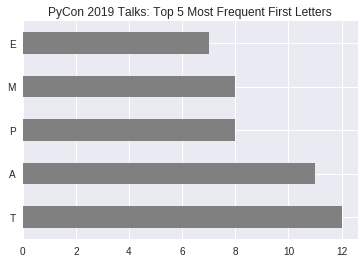

In [45]:
%matplotlib inline

(df['first letter']
 .value_counts()
 .head(5)
 .plot
 .barh(color='grey', 
       title='PyCon 2019 Talks: Top 5 Most Frequent First Letters'));

Histogram of title lengths, in characters

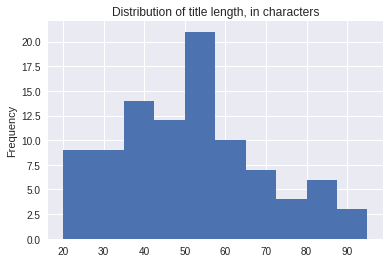

In [46]:
title = 'Distribution of title length, in characters'
df['title character count'].plot.hist(title=title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [47]:
### ASSIGNMENT

# Scraping talk descriptions
descriptions = [tag.text.strip() 
          for tag in soup.select('.presentation-description')]
descriptions

["Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",
 'We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descri

In [48]:
df.head()

,title,title character count,long title,first letter,title word count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [0]:
# Adding new column
df['description'] = pd.DataFrame({'title': descriptions})

In [52]:
df.head()

,title,title character count,long title,first letter,title word count,description
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe..."
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ..."
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa..."
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat..."


In [0]:
# Add description character count
# Add description word count

# Format like this : df['title'].apply(len)


df['description_chars'] = df['description'].apply(len)
df['description_words'] = df['description'].apply(textstat.lexicon_count)

In [54]:
df.head()

,title,title character count,long title,first letter,title word count,description,description_chars,description_words
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,135
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,84
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,96


Describe all the dataframe's columns. What's the average description word count? The minimum? The maximum?

Answer the question: Which descriptions could fit in a tweet?

In [56]:
# Average description word count
count_sum = []
for count in df["description_words"]:
  count_sum.append(count)
average_count = sum(count_sum)/len(count_sum)
average_count

130.82105263157894

In [57]:
# Minimum description word count
minimum_word_count = min(count_sum)
minimum_word_count

20

In [58]:
# Maximum description word count
maximum_word_count = max(count_sum)
maximum_word_count

421

In [59]:
# Descriptions that could fit in a tweet
df[ df['description_chars'] <= 280 ]

,title,title character count,long title,first letter,title word count,description,description_chars,description_words
54,"Making Music with Python, SuperCollider and FoxDot",50,False,M,7,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20


In [60]:
# Descriptions that could fit in a tweet prior to 2018
# Probably would be important if we were, say, trying to determine which descriptions were shared on the site's twitter account over the past five years
df[ df['description_chars'] <= 140 ]

,title,title character count,long title,first letter,title word count,description,description_chars,description_words
54,"Making Music with Python, SuperCollider and FoxDot",50,False,M,7,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20
